# IM-Analytics Qualification Test

## The lapidarist problem

This problem is for you to:

- Show your abilities in data loading, cleaning and descriptive analysis. Some rows contain errors. Extra points: clean these rows and include them in your analysis.

- Show your modeling abilities. Bonus points for testing your model’s error using a test set.provide you with the characteristics of the missing diamonds so you can give us an estimate of how much the stolen diamonds are worth.”

In [1]:
import folium
import sklearn

import sklearn.linear_model as lm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

In [2]:
coords_path = '/content/coords_diamonds.csv'
diamonds_path = '/content/diamonds.csv'

In [3]:
coords = pd.read_csv(coords_path, index_col=0)
diamonds = pd.read_csv(diamonds_path)

## Clean

In [ ]:
# Coords. Check are numbers and float
coords.info()


coords.astype(str)
true_latitude = coords['latitude'].str.match('^[0-9]+$')
latitude = coords['latitude'][true_latitude].astype(float)
longitude = coords['longitude '][true_latitude]


new_coords = pd.DataFrame({'longitude':longitude, 'latitude':latitude})
new_coords.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53930 entries, 0 to 53929
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    53930 non-null  object 
 1   longitude   53930 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.2+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 1738 to 50831
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   longitude  30 non-null     float64
 1   latitude   30 non-null     float64
dtypes: float64(2)
memory usage: 720.0 bytes


In [4]:
# Diamonds. Make sure all are numbers
diamonds.info()

le_cut = LabelEncoder()
le_color = LabelEncoder()
le_clarity = LabelEncoder()

# Save this
diamonds['cut'] = le_cut.fit_transform(diamonds['cut'])
diamonds['color'] = le_color.fit_transform(diamonds['color'])
diamonds['clarity'] = le_clarity.fit_transform(diamonds['clarity'])

diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53930 entries, 0 to 53929
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53930 non-null  int64  
 1   carat       53930 non-null  float64
 2   cut         53930 non-null  object 
 3   color       53930 non-null  object 
 4   clarity     53930 non-null  object 
 5   depth       50968 non-null  float64
 6   table       53930 non-null  float64
 7   price       53930 non-null  int64  
 8   x           52840 non-null  float64
 9   y           53345 non-null  float64
 10  z           53930 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53930 entries, 0 to 53929
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53930 non-null  int64  
 1   carat       53930 non-null  float64
 2   cut         53930 

## Plots

In [ ]:
# Grouping the data by diamond attributes
grouped_data = diamonds.groupby(['carat', 'cut', 'color', 'clarity']).agg(
    min_price=('price', 'min'),
    max_price=('price', 'max'),
    median_price=('price', 'median')
).reset_index()

# Creating candle plots
plt.figure(figsize=(10, 6))

for idx, row in grouped_data.iterrows():
    plt.plot([idx, idx], [row['min_price'], row['max_price']], color='black', linewidth=1)
    plt.plot([idx - 0.2, idx + 0.2], [row['median_price'], row['median_price']], color='red', linewidth=2)
    plt.scatter(idx, row['median_price'], color='red', s=50)

plt.xticks(range(len(grouped_data)), [' '.join(map(str, tpl)) for tpl in grouped_data[['carat', 'cut', 'color', 'clarity']].values], rotation=45, ha='right')
plt.xlabel('Diamond Attributes')
plt.ylabel('Price')
plt.title('Candle Plot of Diamond Prices')
plt.tight_layout()
plt.show()

In [ ]:

# Create a map centered around the mean of coordinates
map = folium.Map(location=new_coords.mean().to_list(), zoom_start=5)

# Add markers for each coordinate
for idx, coord in new_coords.iterrows():
    try:
      lat, lon = coord['latitude'], coord['longitude']
      folium.Marker([lat, lon], popup=f"Diamond {idx+1}").add_to(map)
    except:
      print(idx, coord)

# Save the map to an HTML file
map.save("diamonds_map.html")

# Display the map
map


<Figure size 800x600 with 0 Axes>

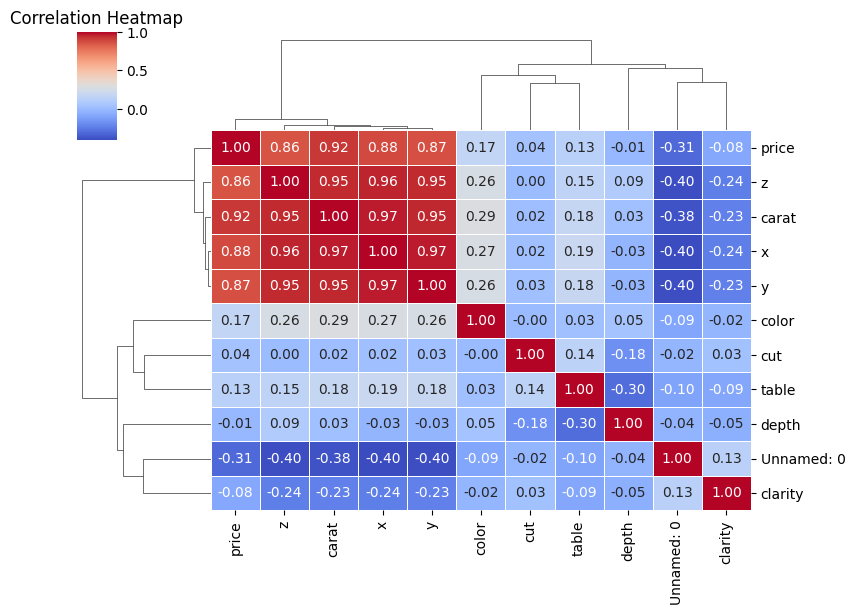

In [ ]:
correlation = diamonds.corr()

plt.figure(figsize=(8, 6))
sns.clustermap(correlation, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, figsize=(8, 6))
plt.title('Correlation Heatmap')
plt.show()

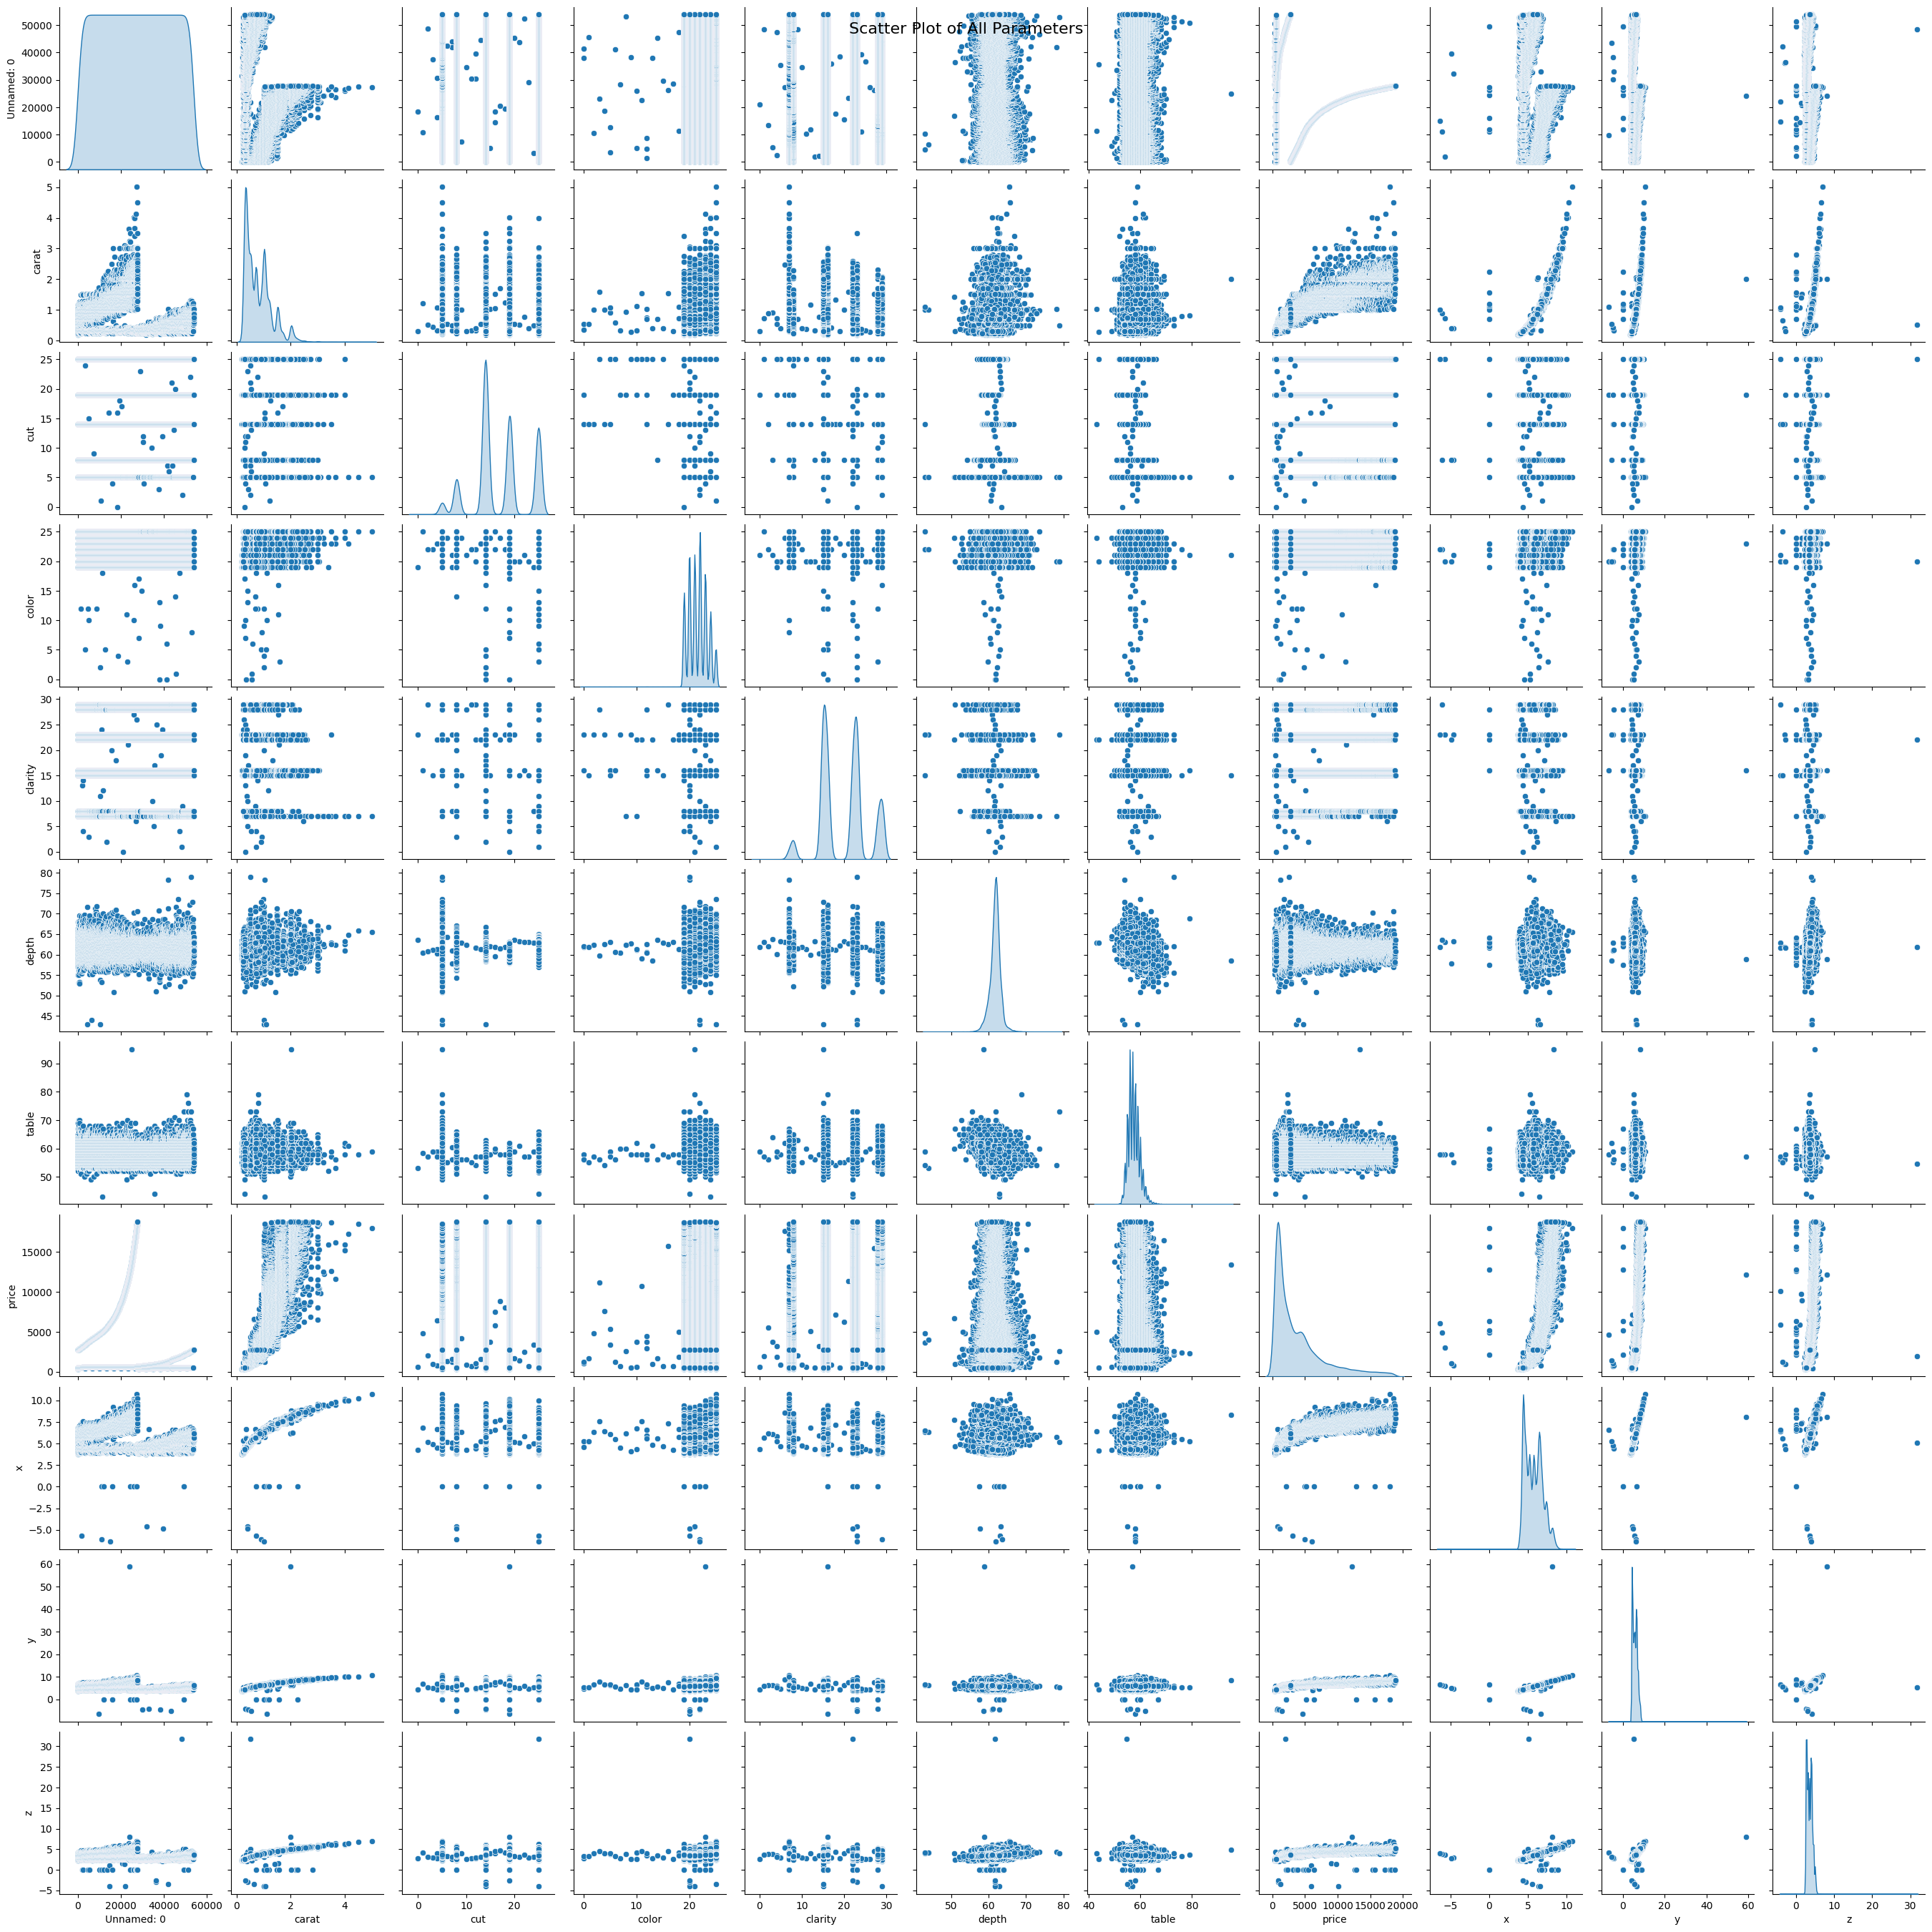

In [ ]:
sns.pairplot(diamonds, kind='scatter', diag_kind='kde', markers='o')
plt.suptitle('Scatter Plot of All Parameters', fontsize=16)
plt.show()

## Models

In [ ]:
# Modelo lineal

target = diamonds[['price']].copy()
properties = diamonds[['x','y','z','carat']].copy()

true_properties = properties.isna().sum(axis=1) == 0
properties = properties[true_properties]
target = target[true_properties]

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    properties, target, test_size=0.33, random_state=42)

# Entrenamiento
lr = lm.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# KNN
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error



# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(properties)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X_scaled, target, test_size=0.33, random_state=42)

# Train the kNN model
k = 5  # number of neighbors
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 2099827.442422296


## Plots

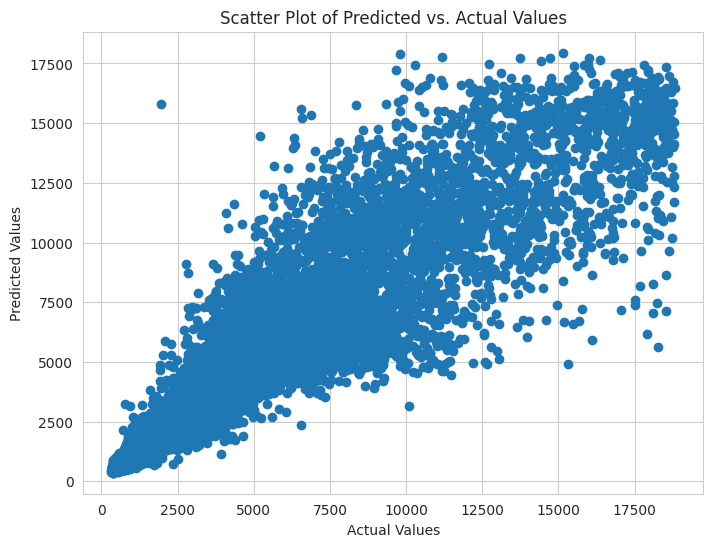

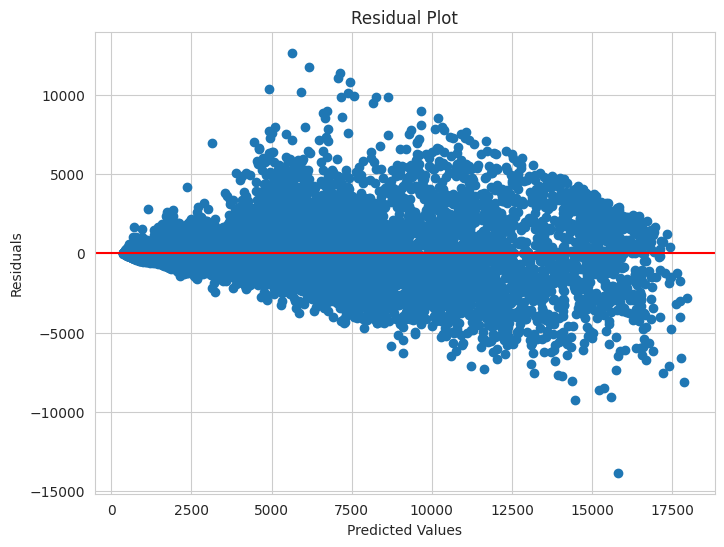

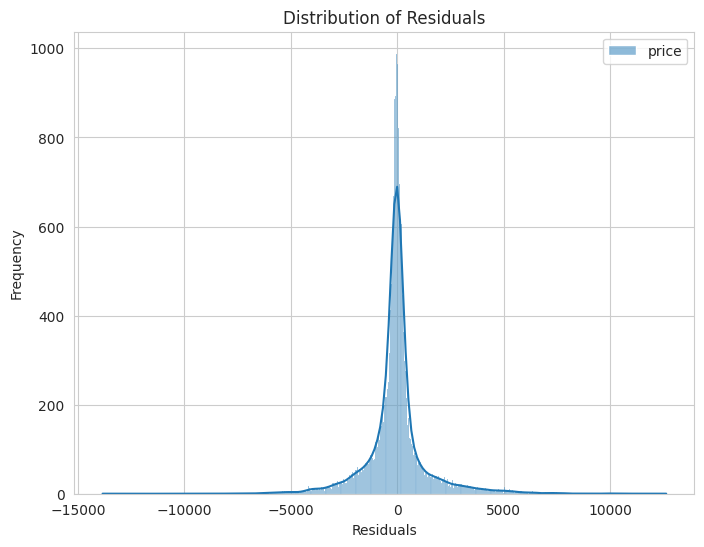

Mean Squared Error: 2099827.442422296


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import scipy.stats as stats

# Scatter Plot of Predicted vs. Actual Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Predicted vs. Actual Values")
plt.show()

# Residual Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_test - y_pred)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

# Distribution of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(y_test - y_pred, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


ValueError: x and y must be the same size

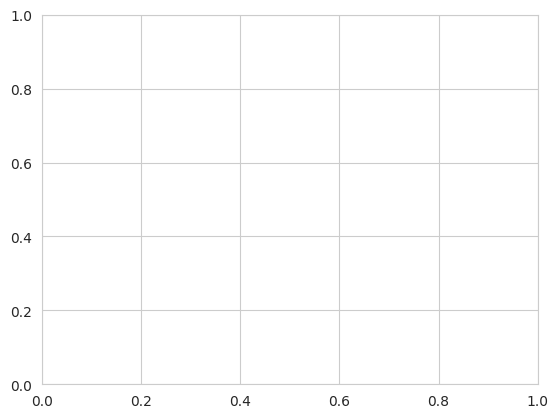

In [ ]:
# Define a threshold for classifying as correct or incorrect
threshold = 0.5  # Adjust as needed

# Calculate the absolute error
absolute_error = np.abs(y_test - y_pred)

# Classify as correct or incorrect based on the threshold
correct_classification = absolute_error <= threshold
incorrect_classification = absolute_error > threshold

# Plot the correctly classified points
plt.scatter(y_test[correct_classification], y_pred[correct_classification], c='green', label='Correct')
# Plot the incorrectly classified points
plt.scatter(y_test[incorrect_classification], y_pred[incorrect_classification], c='red', label='Incorrect')

# Add labels and legend
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Classification of Predictions")
plt.legend()
plt.show()

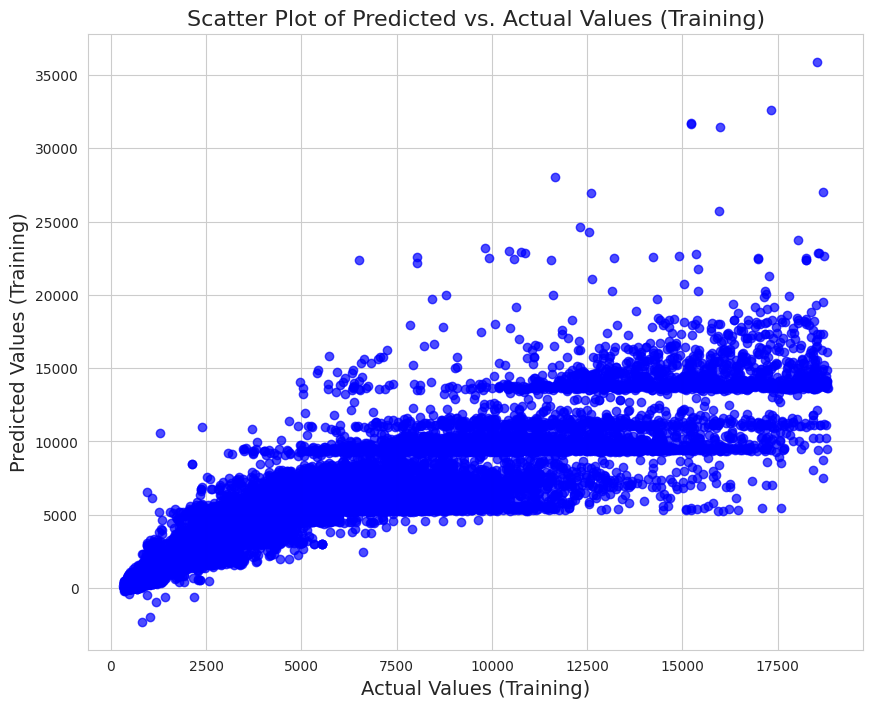

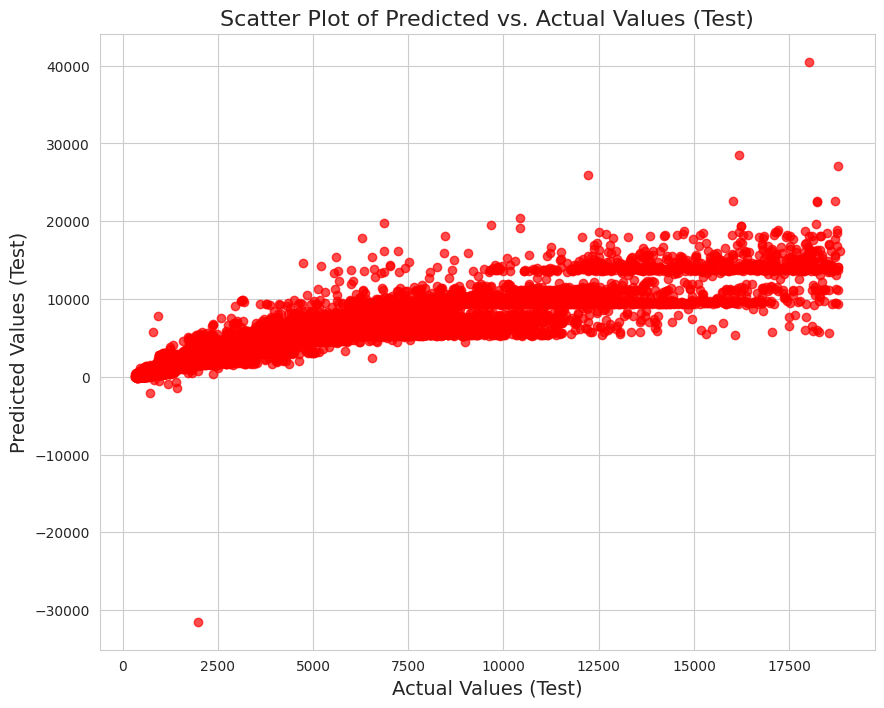

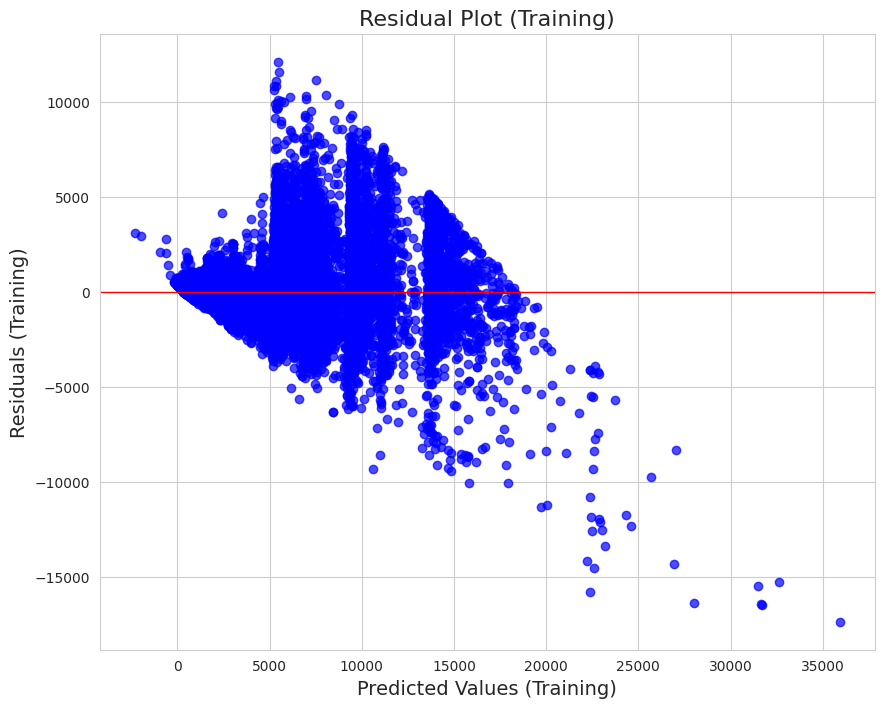

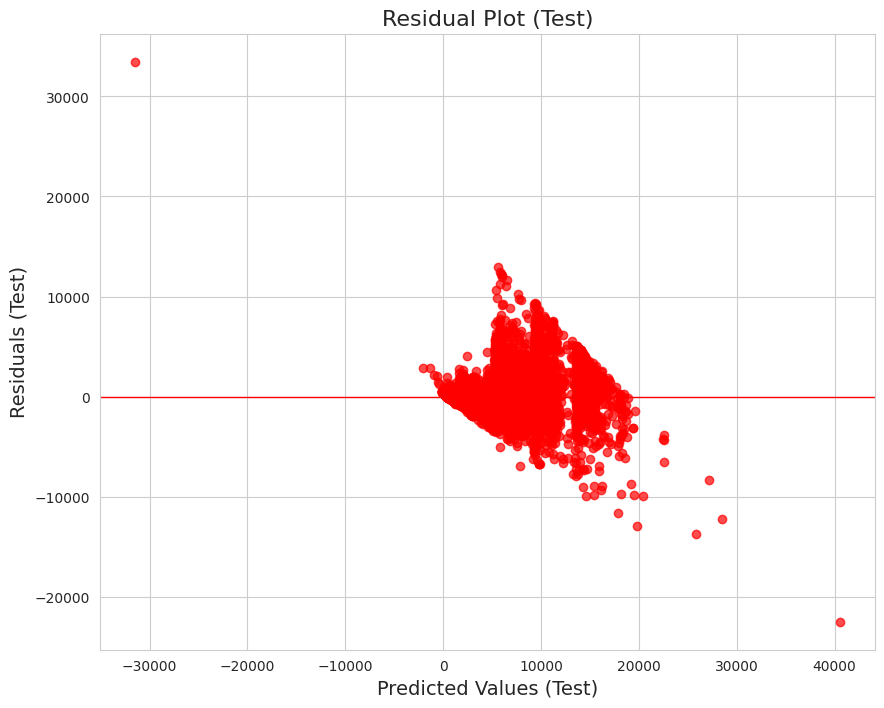

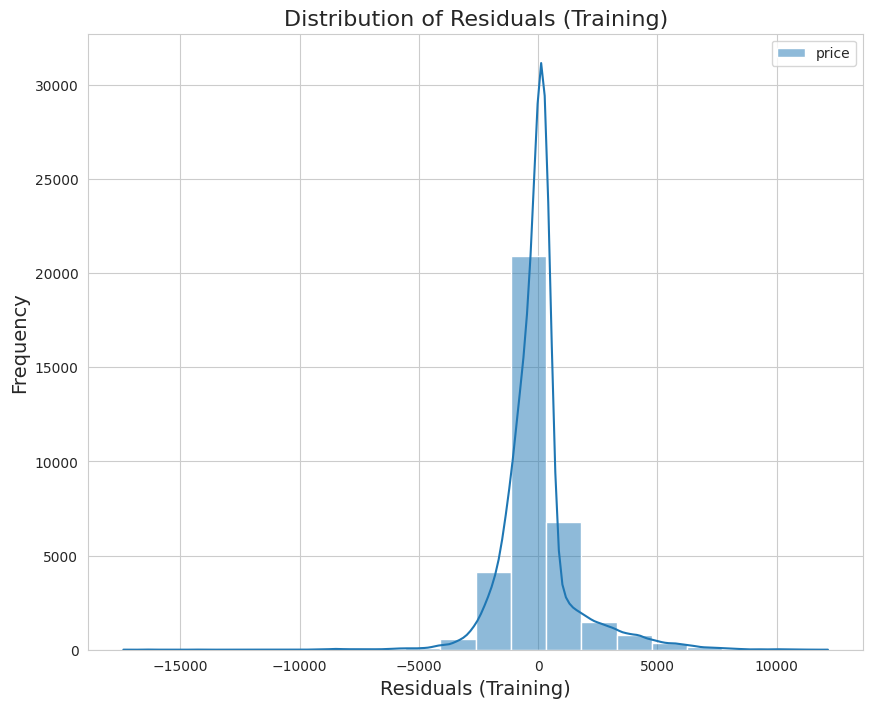

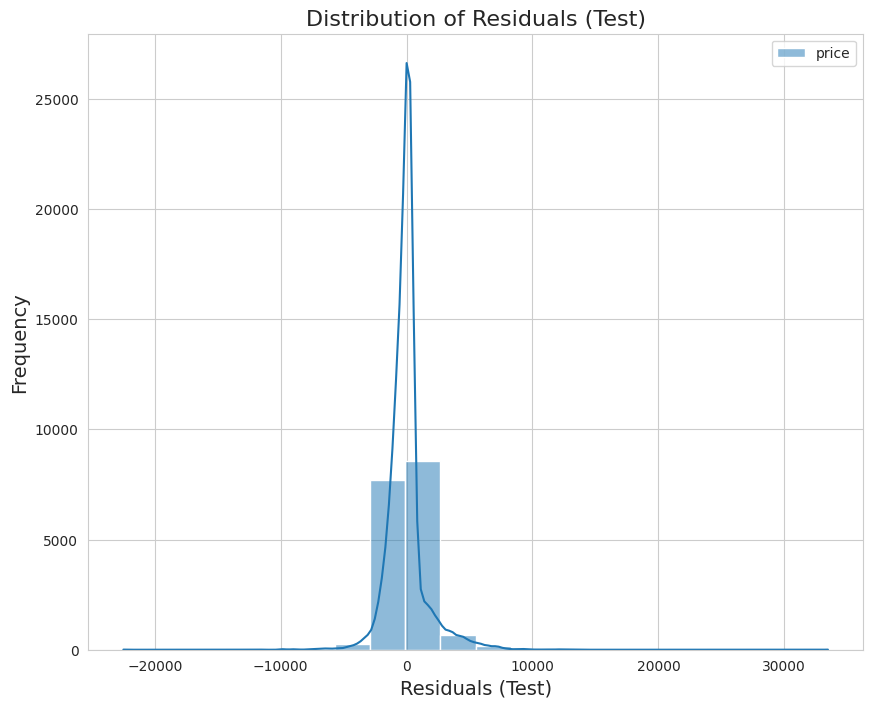

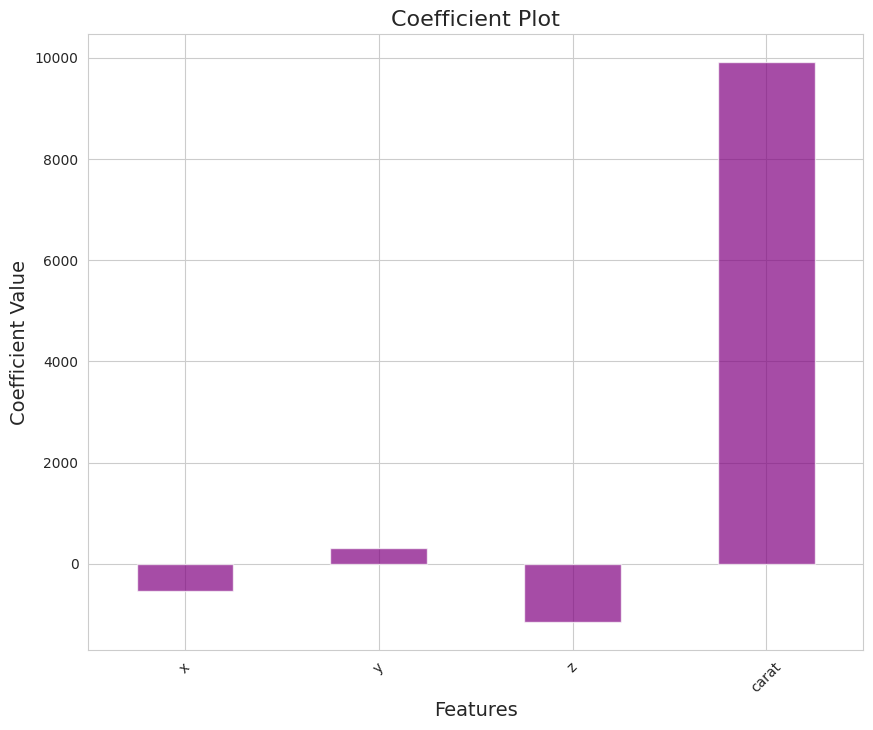

Evaluation Metrics:
R-squared (Training): 0.8540
R-squared (Test): 0.8497
Mean Squared Error (Training): 2333558.5632
Mean Squared Error (Test): 2384327.9782
Root Mean Squared Error (Training): 1527.5990
Root Mean Squared Error (Test): 1544.1269
Mean Absolute Error (Training): 915.9566
Mean Absolute Error (Test): 920.3496


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# Predictions on the test set
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

# Set style for seaborn
sns.set_style("whitegrid")

# Scatter Plot of Predicted vs. Actual Values (Training)
plt.figure(figsize=(10, 8))
plt.scatter(y_train, y_pred_train, color='blue', alpha=0.7)
plt.xlabel("Actual Values (Training)", fontsize=14)
plt.ylabel("Predicted Values (Training)", fontsize=14)
plt.title("Scatter Plot of Predicted vs. Actual Values (Training)", fontsize=16)
plt.show()

# Scatter Plot of Predicted vs. Actual Values (Test)
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_test, color='red', alpha=0.7)
plt.xlabel("Actual Values (Test)", fontsize=14)
plt.ylabel("Predicted Values (Test)", fontsize=14)
plt.title("Scatter Plot of Predicted vs. Actual Values (Test)", fontsize=16)
plt.show()

# Residual Plot (Training)
plt.figure(figsize=(10, 8))
plt.scatter(y_pred_train, y_train - y_pred_train, color='blue', alpha=0.7)
plt.xlabel("Predicted Values (Training)", fontsize=14)
plt.ylabel("Residuals (Training)", fontsize=14)
plt.title("Residual Plot (Training)", fontsize=16)
plt.axhline(y=0, color='r', linestyle='-', linewidth=1)
plt.show()

# Residual Plot (Test)
plt.figure(figsize=(10, 8))
plt.scatter(y_pred_test, y_test - y_pred_test, color='red', alpha=0.7)
plt.xlabel("Predicted Values (Test)", fontsize=14)
plt.ylabel("Residuals (Test)", fontsize=14)
plt.title("Residual Plot (Test)", fontsize=16)
plt.axhline(y=0, color='r', linestyle='-', linewidth=1)
plt.show()

# Distribution of Residuals (Training)
plt.figure(figsize=(10, 8))
sns.histplot(y_train - y_pred_train, kde=True, color='blue', bins=20)
plt.xlabel("Residuals (Training)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of Residuals (Training)", fontsize=16)
plt.show()

# Distribution of Residuals (Test)
plt.figure(figsize=(10, 8))
sns.histplot(y_test - y_pred_test, kde=True, color='red', bins=20)
plt.xlabel("Residuals (Test)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of Residuals (Test)", fontsize=16)
plt.show()

# Coefficient Plot
coefficients_flat = lr.coef_.flatten()
coefficients = pd.Series(coefficients_flat, index=X_train.columns)
plt.figure(figsize=(10, 8))
coefficients.plot(kind='bar', color='purple', alpha=0.7)
plt.title("Coefficient Plot", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Coefficient Value", fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Evaluation Metrics
print("Evaluation Metrics:")
print(f"R-squared (Training): {r2_train:.4f}")
print(f"R-squared (Test): {r2_test:.4f}")
print(f"Mean Squared Error (Training): {mse_train:.4f}")
print(f"Mean Squared Error (Test): {mse_test:.4f}")
print(f"Root Mean Squared Error (Training): {rmse_train:.4f}")
print(f"Root Mean Squared Error (Test): {rmse_test:.4f}")
print(f"Mean Absolute Error (Training): {mae_train:.4f}")
print(f"Mean Absolute Error (Test): {mae_test:.4f}")
